# MBDA 790 Capstone

# Intoduction

The dataset used in this project was downloaded from the UCI Machine Learning Repository and is a collection of handwritten letters used for image classification. The name of the dataset is "Letter Recognition" and was originally created in 1990 by David Slate. There are 20,000 instances in the data set each representing a handwritten english capital letters in 20 different fonts. Although the scope of this assignment is to conduct exploratory analysis and partition the data, efforts undertaken during this assingment will feed into the larger goals of the project. The goal of the project will be the creation of an image classification system that will iteratively improve itself through a simulated online learning environment. During this paper, the data will be explored for imbalances, variables inspected to understand the distibution of data, partitioned for training and testing, and partitioned for model improvement. 

## Prepare Environment

In [ ]:
!pip install matplotlib
!pip install numpy
!pip install numpy scipy scikit-learn
!pip install pandas
!pip install seaborn

In [1]:
import numpy as np                            
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import BernoulliNB             # used to create Naive Bayes (NB) Model
from sklearn.neighbors import KNeighborsClassifier      # used to create KNN (KNN) Model
from sklearn.linear_model import LogisticRegression     # used to create Logistic Regression Model
from sklearn import svm                                 # used to create Support Vector Machine (SVM) Model
from sklearn.tree import DecisionTreeClassifier         # used to create Decision Tree Classifier (
from sklearn.ensemble import RandomForestClassifier     # used to create Random Forest (RF) Model
from sklearn.neural_network import MLPClassifier        # used to create Artificial Neural Network (ANN)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split        
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,f1_score, roc_auc_score 
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Import Data Set

In [2]:
DBHI = pd.read_csv('diabetes_binary_health_indicators.csv')

In [ ]:
# INFO: Show variable info
DBHI.info()

In [ ]:
# DESCRIBE: Show statistical summary of dataframe
DBHI.describe()

In [ ]:
# Print head of features data frame
DBHI.head()

In [3]:
# DBHI2 = Paired down version of DBHI
DBHI2 = DBHI.iloc[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16]]
DBHI2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130866 entries, 0 to 130865
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       130866 non-null  float64
 1   HighBP                130866 non-null  float64
 2   HighChol              130866 non-null  float64
 3   BMI                   130866 non-null  float64
 4   Smoker                130866 non-null  float64
 5   Stroke                130866 non-null  float64
 6   HeartDiseaseorAttack  130866 non-null  float64
 7   PhysActivity          130865 non-null  float64
 8   Fruits                130865 non-null  float64
 9   Veggies               130865 non-null  float64
 10  GenHlth               130865 non-null  float64
 11  MentHlth              130865 non-null  float64
 12  PhysHlth              130865 non-null  float64
dtypes: float64(13)
memory usage: 13.0 MB


In [ ]:
# PAIRPLOT: Create PairPlot of variables in DataFrame
plt.figure(figsize=(10, 8))
sns.pairplot(DBHI2)
plt.show()

In [ ]:
# Print tail of data frame
DBHI.tail()

In [ ]:
# Create boxplots for each variable
sns.set(style="whitegrid") 
plt.figure(figsize=(6, 4))
sns.boxplot(data=DBHI2)
plt.xlabel("Variables")
plt.ylabel("Values")
plt.title("Boxplots for Each Variable in DBHI2")
plt.xticks(rotation=70)
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot 1: Distribution of 'Diabetes_binary'
sns.countplot(x='Diabetes_binary', data=DBHI, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Diabetes_binary')
axes[0, 0].set_xlabel('Diabetes_binary')
axes[0, 0].set_ylabel('Count')

# Plot 2: Distribution of 'HighBP'
sns.countplot(x='HighBP', data=DBHI, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of HighBP')
axes[0, 1].set_xlabel('HighBP')
axes[0, 1].set_ylabel('Count')

# Plot 3: Distribution of 'High Cholesterol'
sns.countplot(x='HighChol', data=DBHI, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of High Cholesterol')
axes[1, 0].set_xlabel('High Cholesterol')
axes[1, 0].set_ylabel('Count')

# Plot 4: Distribution of 'Smoker'
sns.countplot(x='Smoker', data=DBHI, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Smokers')
axes[1, 1].set_xlabel('Smoker')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Count the number of 1s in the Diabetes_binary column
C1 = DBHI['Diabetes_binary'].value_counts()[1]
C0 = DBHI['Diabetes_binary'].value_counts()[0]
print("Number of 1s:", C1)
print("Number of 0s:", C0)

In [ ]:
# Count the number of 1s in the HighBP column
C1a = DBHI['HighBP'].value_counts()[1]
C0a = DBHI['HighBP'].value_counts()[0]
print("Number of 1s:", C1a)
print("Number of 0s:", C0a)

In [ ]:
# Count the number of 1s in the High Cholesterol column
C1b = DBHI['HighChol'].value_counts()[1]
C0b = DBHI['HighChol'].value_counts()[0]
print("Number of 1s:", C1b)
print("Number of 0s:", C0b)

In [ ]:
# Count the number of 1s in the Smoker column
C1c = DBHI['Smoker'].value_counts()[1]
C0c = DBHI['Smoker'].value_counts()[0]
print("Number of 1s:", C1c)
print("Number of 0s:", C0c)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot 1: Distribution of 'Fruit' Consumption
sns.countplot(x='Fruits', data=DBHI, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Fruit Consumption')
axes[0, 0].set_xlabel('Fruit Consumption')
axes[0, 0].set_ylabel('Count')

# Plot 2: Distribution of 'Vegetable' Consumption
sns.countplot(x='Veggies', data=DBHI, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Vegetable Consumption')
axes[0, 1].set_xlabel('Vegetable Consumption')
axes[0, 1].set_ylabel('Count')

# Plot 3: Distribution of 'Sex'
sns.countplot(x='Sex', data=DBHI, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')

# Plot 4: Distribution of 'Age'
sns.countplot(x='Age', data=DBHI, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Age')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Count the number of 1s in the Smoker column
C1d = DBHI['Fruits'].value_counts()[1]
C0d = DBHI['Fruits'].value_counts()[0]
print("Number of 1s:", C1d)
print("Number of 0s:", C0d)

In [ ]:
# Count the number of 1s in the Smoker column
C1e = DBHI['Veggies'].value_counts()[1]
C0e = DBHI['Veggies'].value_counts()[0]
print("Number of 1s:", C1e)
print("Number of 0s:", C0e)

In [ ]:
# Count the number of 1s in the Smoker column
C1f = DBHI['Sex'].value_counts()[1]
C0f = DBHI['Sex'].value_counts()[0]
print("Number of 1s:", C1f)
print("Number of 0s:", C0f)

In [ ]:
# Create a correlation matrix of the features in the data set
correlation_matrix = DBHI2.corr()
print(correlation_matrix)

In [ ]:
# Correlation matrix heatmap of data frame
sns.heatmap(correlation_matrix, annot = False, fmt = ".2f", cmap = 'coolwarm',
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [ ]:
# INFO: Show variable info
DBHI2.info()

## Split Data

In [ ]:
# NAs: Check for any NA values and empty strings, and Print the rows with Missing Values 
NAVal = DBHI2.isnull().any(axis=1).to_numpy().nonzero()[0]
EmpStr = DBHI2.applymap(lambda x: x == '').any(axis=1).to_numpy().nonzero()[0]
MissIndic = list(set(NAVal) | set(EmpStr))
MVRs = DBHI2.iloc[MissIndic]
print(MVRs)

In [ ]:
DBHI2 = DBHI2.drop(index=130865)

In [ ]:
# NAs: Check for any NA values and empty strings, and Print the rows with Missing Values 
NAVal = DBHI2.isnull().any(axis=1).to_numpy().nonzero()[0]
EmpStr = DBHI2.applymap(lambda x: x == '').any(axis=1).to_numpy().nonzero()[0]
MissIndic = list(set(NAVal) | set(EmpStr))
MVRs = DBHI2.iloc[MissIndic]
print(MVRs)

In [4]:
# Plug NaN values with 0
DBHI2 = DBHI2.fillna(0)

In [5]:
# Split variables features into dataframe X
X = DBHI2.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130866 entries, 0 to 130865
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                130866 non-null  float64
 1   HighChol              130866 non-null  float64
 2   BMI                   130866 non-null  float64
 3   Smoker                130866 non-null  float64
 4   Stroke                130866 non-null  float64
 5   HeartDiseaseorAttack  130866 non-null  float64
 6   PhysActivity          130866 non-null  float64
 7   Fruits                130866 non-null  float64
 8   Veggies               130866 non-null  float64
 9   GenHlth               130866 non-null  float64
 10  MentHlth              130866 non-null  float64
 11  PhysHlth              130866 non-null  float64
dtypes: float64(12)
memory usage: 12.0 MB


In [6]:
# Split variables features into dataframe Y
Y = DBHI2.iloc[:, [0]]
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130866 entries, 0 to 130865
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Diabetes_binary  130866 non-null  float64
dtypes: float64(1)
memory usage: 1022.5 KB


* Split Data as Columnar Dataframes

In [ ]:
# Split data into training and testing sets:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

* Split Data with y as an Array

In [7]:
# Convert the 'Diabetes_Binary column to a NumPy array
y = Y['Diabetes_binary'].to_numpy()
# Change Y column shape to array
y = y.ravel()
# Split data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Naive Bayes Model (0)

In [ ]:
# initialize the model
BNB = BernoulliNB(binarize=0.0)
BNB.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = BNB.predict(X_test)

# Evaluate its performance on the test set
initial_accuracy = accuracy_score(y_test, y_pred)
print(f'Initial model accuracy: {initial_accuracy:.4f}')

In [ ]:
# Calculate F1 Score
F1 = f1_score(y_pred, y_test, average="weighted")
print("F1 Score:", F1)

In [ ]:
# Calculate the confusion matrix
CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(CM)

In [ ]:
# Visualize Confusion Matrix
labels = [0,1]
CM1 = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=CM1, display_labels=labels)
disp.plot();

In [ ]:
# Calculate the sensitivity (true positive rate)
SENSE = CM[1][1] / (CM[1][0] + CM[1][1])
print("Sensitivity:", SENSE)

In [ ]:
# Generate a classification report
RPT = classification_report(y_test, y_pred)
print("Classification Report:")
print(RPT)

In [ ]:
# Calculate the ROC-AUC score
RcAc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", RcAc)

In [ ]:
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [ ]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes - Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

# K-Nearest Neighbor (1a)

In [ ]:
# Create a kNN classifier with k=3 (you can adjust k as needed)
KNN = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit the model to the training data
KNN.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred1 = KNN.predict(X_test)

# Evaluate its performance on the test set
initial_accuracy = accuracy_score(y_test, y_pred1)
print(f'Initial model accuracy: {initial_accuracy:.4f}')

In [ ]:
# Calculate F1 Score
F1a = f1_score(y_pred1, y_test, average="weighted")
print("F1 Score:", F1a)

In [ ]:
# Calculate the confusion matrix
CMa = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(CMa)

In [ ]:
# Visualize Confusion Matrix
labels = [0,1]
CM1a = confusion_matrix(y_test, y_pred1, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=CM1a, display_labels=labels)
disp.plot();

In [ ]:
# Calculate the sensitivity (true positive rate)
SENSE1 = CMa[1][1] / (CMa[1][0] + CMa[1][1])
print("Sensitivity:", SENSE1)

In [ ]:
# Generate a classification report
RPT1 = classification_report(y_test, y_pred1)
print("Classification Report:")
print(RPT1)

In [ ]:
# Calculate the ROC-AUC score
RcAc1 = roc_auc_score(y_test, y_pred1)
print("ROC-AUC Score:", RcAc1)

In [ ]:
# Calculate the ROC curve and AUC
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

In [ ]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes - Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression (2b)

In [ ]:
# Create a logistic regression model
LRM = LogisticRegression()

In [ ]:
# Fit the model to the training data
LRM.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred2 = LRM.predict(X_test)

# Evaluate its performance on the test set
initial_accuracy = accuracy_score(y_test, y_pred2)
print(f'Initial model accuracy: {initial_accuracy:.4f}')

In [ ]:
# Calculate F1 Score
F1b = f1_score(y_pred2, y_test, average="weighted")
print("F1 Score:", F1b)

In [ ]:
# Calculate the confusion matrix
CMb = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(CMb)

In [ ]:
# Visualize Confusion Matrix
labels = [0,1]
CM2 = confusion_matrix(y_test, y_pred2, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=CM2, display_labels=labels)
disp.plot();

In [ ]:
# Calculate the sensitivity (true positive rate)
SENSE2 = CMb[1][1] / (CMb[1][0] + CMb[1][1])
print("Sensitivity:", SENSE2)

In [ ]:
# Generate a classification report
RPT2 = classification_report(y_test, y_pred2)
print("Classification Report:")
print(RPT2)

In [ ]:
# Calculate the ROC-AUC score
RcAc2 = roc_auc_score(y_test, y_pred2)
print("ROC-AUC Score:", RcAc2)

In [ ]:
# Calculate the ROC curve and AUC
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred2)
roc_auc2 = auc(fpr2, tpr2)

In [ ]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes - Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine (3c)

In [37]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [38]:
# Create an SVM classifier with a linear kernel
SVMC = SVC(kernel='rbf')

In [39]:
# Fit the model to the training data
SVMC.fit(X_train, y_train)

SVC()

In [40]:
# Make predictions on the test set
y_pred3 = SVMC.predict(X_test)

# Evaluate its performance on the test set
initial_accuracy = accuracy_score(y_test, y_pred3)
print(f'Initial model accuracy: {initial_accuracy:.4f}')

Initial model accuracy: 0.8616


In [ ]:
# Calculate F1 Score
F1c = f1_score(y_pred3, y_test, average="weighted")
print("F1 Score:", F1c)

In [ ]:
# Calculate the confusion matrix
CMc = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(CMc)

In [ ]:
# Visualize Confusion Matrix
labels = [0,1]
CM3 = confusion_matrix(y_test, y_pred3, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=CM3, display_labels=labels)
disp.plot();

In [ ]:
# Calculate the sensitivity (true positive rate)
SENSE3 = CMc[1][1] / (CMc[1][0] + CMc[1][1])
print("Sensitivity:", SENSE3)

In [ ]:
# Generate a classification report
RPT3 = classification_report(y_test, y_pred3)
print("Classification Report:")
print(RPT3)

In [43]:
# Calculate the ROC-AUC score
RcAc3 = roc_auc_score(y_test, y_pred3)
print("ROC-AUC Score:", RcAc3)

ROC-AUC Score: 0.5001853732259295


In [44]:
# Calculate the ROC curve and AUC
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred3)
roc_auc3 = auc(fpr3, tpr3)

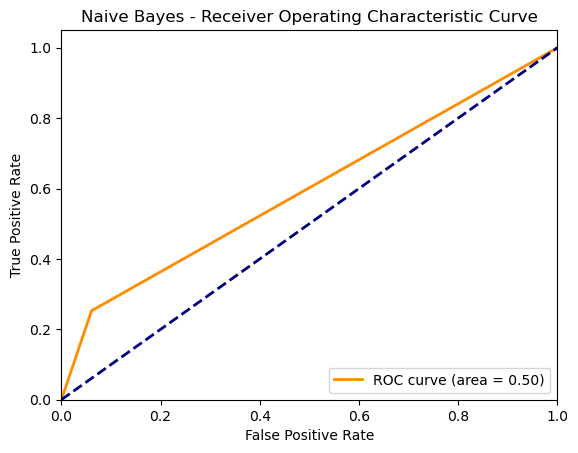

In [45]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes - Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree Classifier (4d)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
# Create a decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
# Make predictions on the test set
y_pred4 = DTC.predict(X_test)

# Evaluate its performance on the test set
initial_accuracy = accuracy_score(y_test, y_pred4)
print(f'Initial model accuracy: {initial_accuracy:.4f}')

Initial model accuracy: 0.8297


In [ ]:
# Calculate F1 Score
F1d = f1_score(y_pred4, y_test, average="weighted")
print("F1 Score:", F1d)

In [ ]:
# Calculate the confusion matrix
CMd = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(CMd)

In [ ]:
# Visualize Confusion Matrix
labels = [0,1]
CM4 = confusion_matrix(y_test, y_pred4, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=CM4, display_labels=labels)
disp.plot();

In [ ]:
# Calculate the sensitivity (true positive rate)
SENSE4 = CMd[1][1] / (CMd[1][0] + CMd[1][1])
print("Sensitivity:", SENSE4)

In [ ]:
# Generate a classification report
RPT4 = classification_report(y_test, y_pred4)
print("Classification Report:")
print(RPT4)

In [49]:
# Calculate the ROC-AUC score
RcAc4 = roc_auc_score(y_test, y_pred4)
print("ROC-AUC Score:", RcAc4)

ROC-AUC Score: 0.5832697768733437


In [50]:
# Calculate the ROC curve and AUC
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred4)
roc_auc4 = auc(fpr4, tpr4)

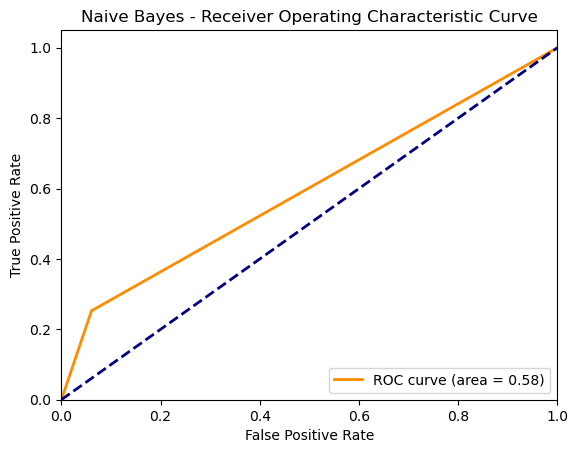

In [51]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes - Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest Model (5e)

In [9]:
# Create a Random Forest classifier
RFC = RandomForestClassifier(n_estimators=100)  # Number of trees
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# Make predictions on the test set
y_pred5 = RFC.predict(X_test)

# Evaluate its performance on the test set
initial_accuracy = accuracy_score(y_test, y_pred5)
print(f'Initial model accuracy: {initial_accuracy:.4f}')

Initial model accuracy: 0.8482


In [ ]:
# Calculate F1 Score
F1d = f1_score(y_pred5, y_test, average="weighted")
print("F1 Score:", F1d)

In [ ]:
# Calculate the confusion matrix
CMe = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix:")
print(CMe)

In [ ]:
# Visualize Confusion Matrix
labels = [0,1]
CM5 = confusion_matrix(y_test, y_pred5, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=CM5, display_labels=labels)
disp.plot();

In [ ]:
# Calculate the sensitivity (true positive rate)
SENSE5 = CMe[1][1] / (CMe[1][0] + CMe[1][1])
print("Sensitivity:", SENSE5)

In [ ]:
# Generate a classification report
RPT5 = classification_report(y_test, y_pred5)
print("Classification Report:")
print(RPT5)

In [54]:
# Calculate the ROC-AUC score
RcAc5 = roc_auc_score(y_test, y_pred5)
print("ROC-AUC Score:", RcAc5)

ROC-AUC Score: 0.5757473891840876


In [55]:
# Calculate the ROC curve and AUC
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred5)
roc_auc5 = auc(fpr5, tpr5)

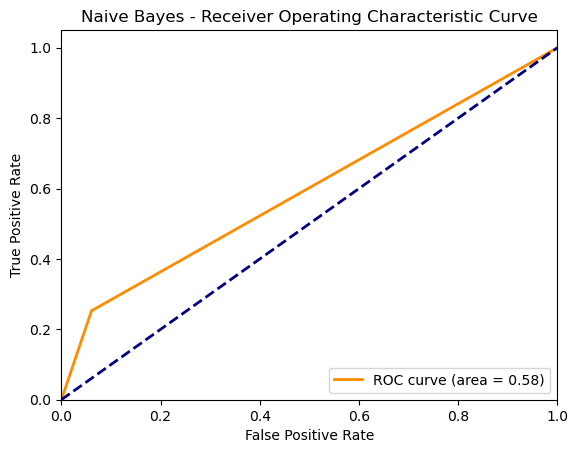

In [56]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes - Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

# Permutation Feature Importance (Random Forest)

In [11]:
from sklearn.inspection import permutation_importance

In [12]:
# Calculate permutation importance
perm_importance = permutation_importance(RFC, X_test, y_test)

In [13]:
# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()

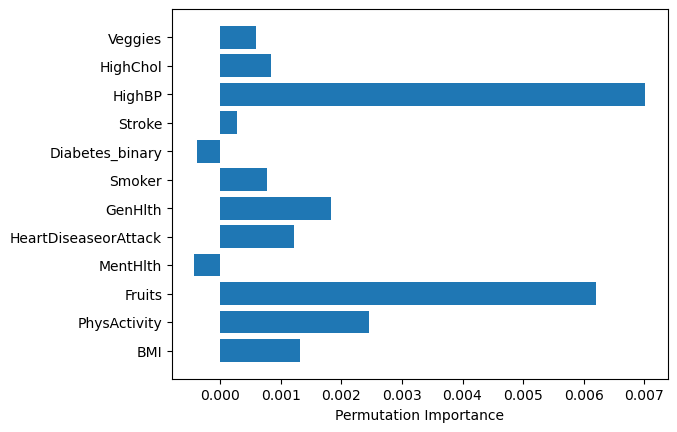

In [14]:
# Plot the importance
plt.barh(sorted_idx, perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), DBHI2.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

# Artificial Neural Network (6f)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create an instance of the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(500, 50), activation='relu', solver='adam', random_state=42)

In [ ]:
# Train the model
mlp.fit(X_train_scaled, y_train)

In [ ]:
# Evaluate the model
accuracy = mlp.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

In [ ]:
# Make predictions on the test set
y_pred6 = mlp.predict(X_test)

# Evaluate its performance on the test set
initial_accuracy = accuracy_score(y_test, y_pred6)
print(f'Initial model accuracy: {initial_accuracy:.4f}')

In [ ]:
# Calculate F1 Score
F1f = f1_score(y_pred6, y_test, average="weighted")
print("F1 Score:", F1f)

In [ ]:
# Calculate the confusion matrix
CMf = confusion_matrix(y_test, y_pred6)
print("Confusion Matrix:")
print(CMf)

In [ ]:
# Visualize Confusion Matrix
labels = [0,1]
CM6 = confusion_matrix(y_test, y_pred6, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=CM6, display_labels=labels)
disp.plot();

In [ ]:
# Calculate the sensitivity (true positive rate)
SENSE6 = CMf[1][1] / (CMf[1][0] + CMf[1][1])
print("Sensitivity:", SENSE6)

In [ ]:
# Generate a classification report
RPT6 = classification_report(y_test, y_pred6)
print("Classification Report:")
print(RPT6)

In [ ]:
# Calculate the ROC-AUC score
RcAc6 = roc_auc_score(y_test, y_pred6)
print("ROC-AUC Score:", RcAc6)

In [ ]:
# Calculate the ROC curve and AUC
fpr6, tpr6, thresholds = roc_curve(y_test, y_pred6)
roc_auc6 = auc(fpr6, tpr6)

In [ ]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc6)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes - Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Hybrid Random Forest / Logistic Regression

In [8]:
# Initialize the models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=200)

In [9]:
# Train the models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [10]:
# Make predictions
rf_predictions = rf_model.predict_proba(X_test)
lr_predictions = lr_model.predict_proba(X_test)

In [12]:
# Combine the predictions
combined_predictions = (rf_predictions + lr_predictions) / 2

In [13]:
# Convert probabilities to class labels
final_predictions = np.argmax(combined_predictions, axis=1)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, final_predictions)
print(f'Hybrid Model Accuracy: {accuracy:.2f}')


Hybrid Model Accuracy: 0.86


In [15]:
# Initialize the models
bnb_model = BernoulliNB()
lr_model = LogisticRegression(max_iter=200)

In [16]:
# Train the models
bnb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [17]:
# Make predictions
bnb_predictions = bnb_model.predict_proba(X_test)
lr_predictions = lr_model.predict_proba(X_test)

In [18]:
# Combine the predictions
combined_predictions = (bnb_predictions + lr_predictions) / 2

In [19]:
# Convert probabilities to class labels
final_predictions = np.argmax(combined_predictions, axis=1)

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, final_predictions)
print(f'Hybrid Model Accuracy: {accuracy:.2f}')

Hybrid Model Accuracy: 0.86
